# 05 Data Outliers

Importing libraries.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Reading files.

In [12]:
x = pd.read_csv('../01_data/x.csv').iloc[:,1:]
x_mm = pd.read_csv('../01_data/x_mm.csv').iloc[:,1:]
x_tr_mm = pd.read_csv('../01_data/x_tr_mm.csv').iloc[:,1:]
x_ss = pd.read_csv('../01_data/x_ss.csv').iloc[:,1:]
x_tr_ss = pd.read_csv('../01_data/x_tr_ss.csv').iloc[:,1:]

In [18]:
pd.set_option('display.max_columns', None)
x_tr_mm.head()

,birth_year,age_start_years,age_end_years,shellfish_start,shellfish_end,fish_start,fish_end,milk_start,milk_end,soy_start,soy_end,egg_start,egg_end,wheat_start,wheat_end,peanut_start,peanut_end,sesame_start,sesame_end,nut_start,nut_end,nut_c_s,nut_c_e,allerg_c_s,allerg_c_e
0,0.787425,0.039610,0.169300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000
1,0.371225,0.906513,0.994900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000
2,0.787425,0.004885,0.395871,NaN,NaN,NaN,NaN,0.373186,0.425877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.999989,0.999994
3,0.717234,0.487443,0.528840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000
4,0.787425,0.006096,0.364430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000


 \
 \
Box-Plotting x.

In [35]:
#%%writefile -a functions.py

def plot_boxplot(df):
    '''Function to plot boxplots for dataframe:
    2 columns, n rows (number of columns of dataframe) '''
     
    col_names = list(df)
    
    plt_size = math.ceil(len(col_names)/2)  #define rows in subplot
    n = 0 #counter to attribute position for plot
    
    #loop to attribute positions in rows and columns
    col_num = [] 
    row_num = []
    for i1 in [0,1]:
        for i2 in list(range(0,plt_size)):
            col_num.append(i1)
            row_num.append(i2)
       
    fig, ax = plt.subplots(plt_size,2, figsize=(10,30))
    
    #loop to plot boxplots
    for i in col_names:
        sns.boxplot(data = df[i], orient = 'h', color='#a1c9f4', ax = ax[row_num[n],col_num[n]])
        ax[row_num[n],col_num[n]].set_ylabel(i)
        n += 1
                                                        
    plt.show()

In [ ]:
%run functions.py

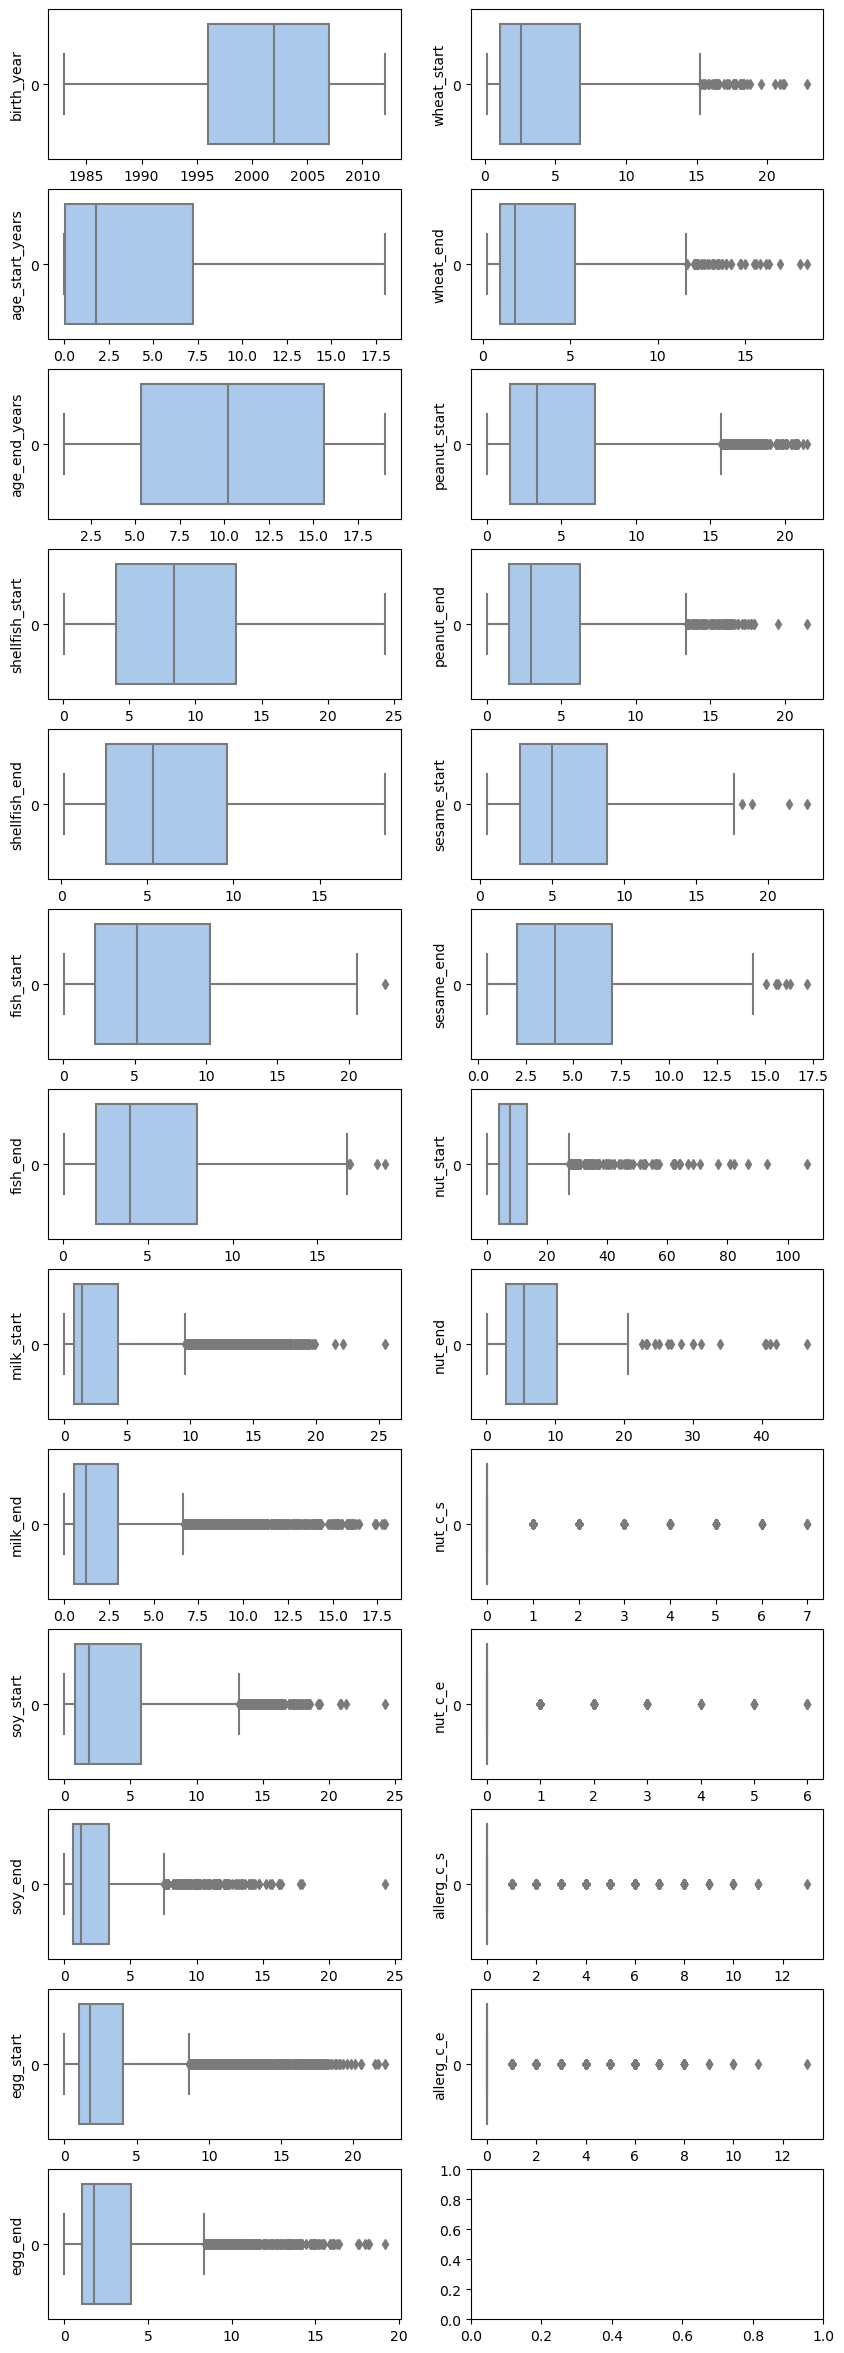

In [42]:
plot_boxplot(x)

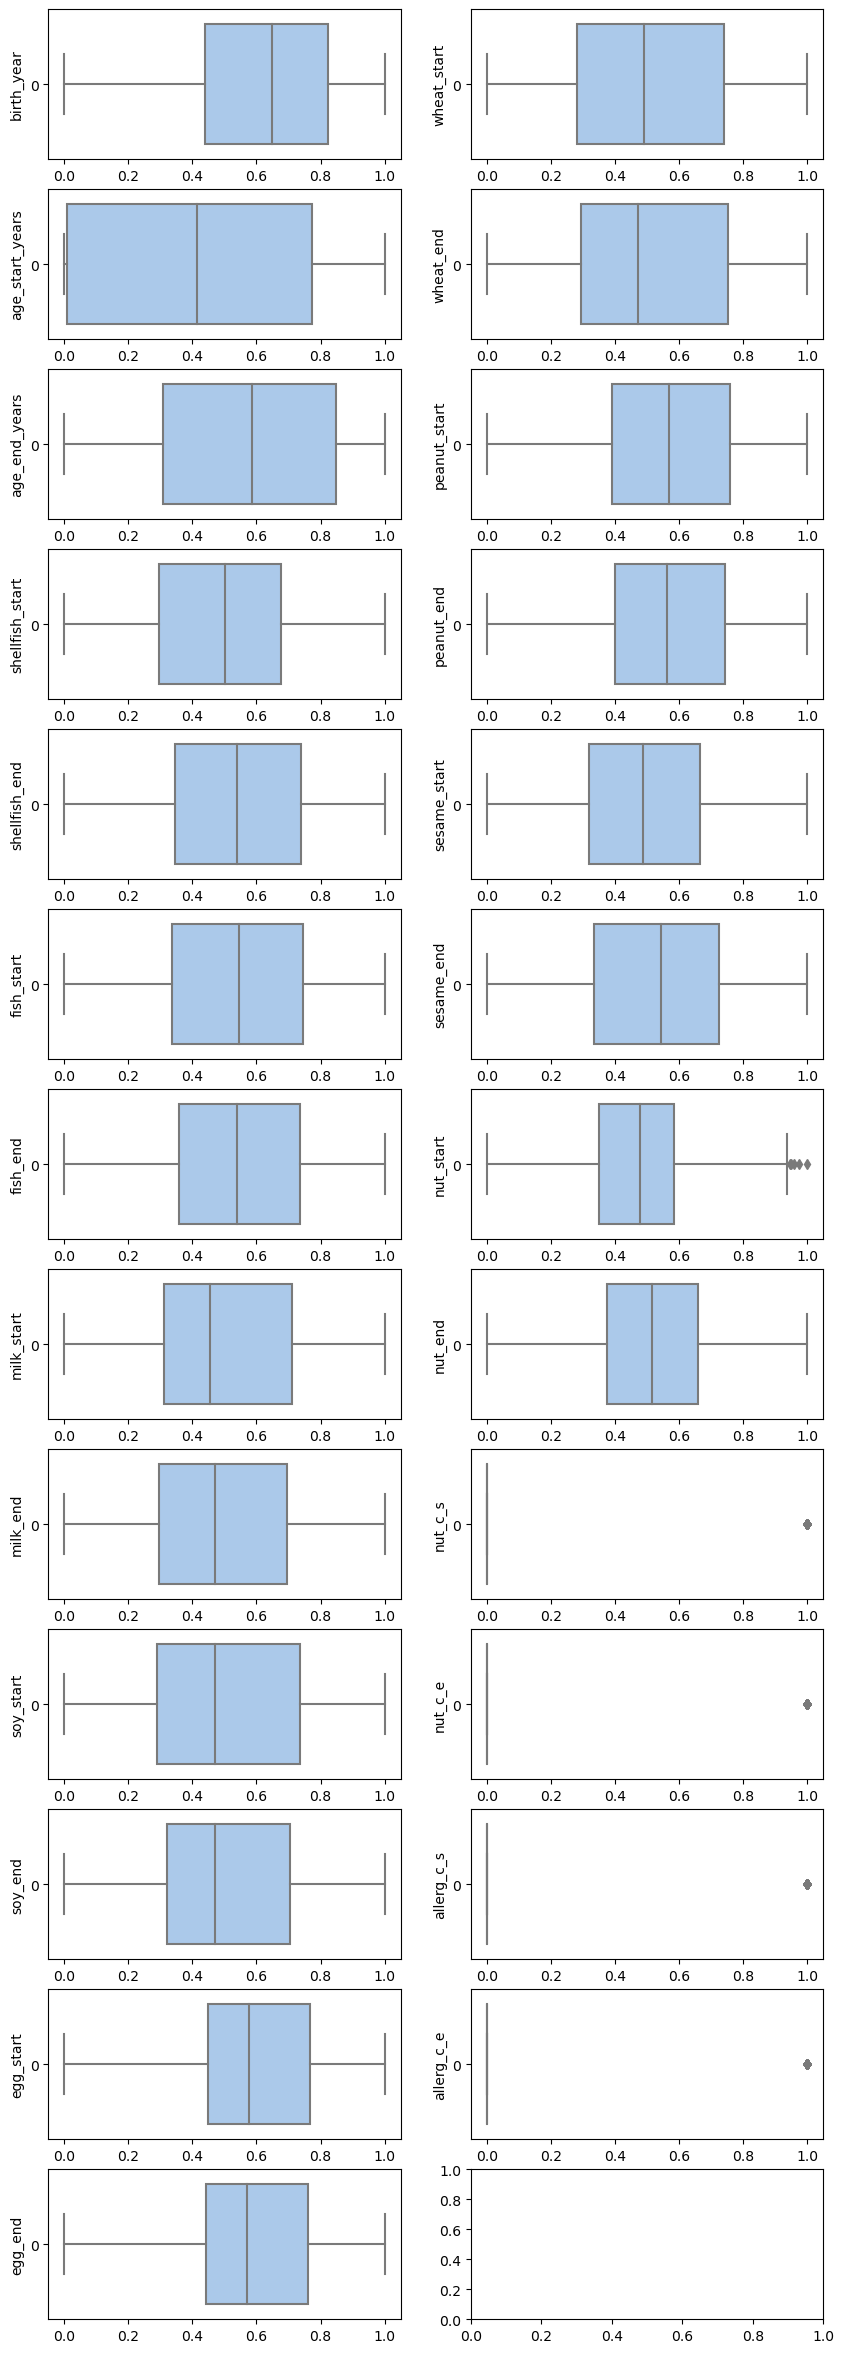

In [36]:
plot_boxplot(x_tr_mm)

 \
 \
A lot more outliers are considered before transformers and scalers transformation.

## Determining outliers based on mean and standard deviation.

In [87]:
#%%writefile -a functions.py

def remove_outliers(df):
    '''function to remove outliers outside of 3x standard deviation'''
    
    df_copy = df.copy()
    
    col_names = list(df.columns)
    std = [] #list to store each row mean
    mean_m = [] #list to store each column mean
    
    #storing mean and std in lists    
    for i in col_names: 
        std.append (3*df_copy[i].std())
        mean_m.append (df_copy[i].mean())
    
    #creating dataframe with rows to be excluded. can't do automatically rows to be included as that would excluded Nan
    for c,s,m in zip(col_names,std,mean_m):
        df_remove = df_copy[ ( df_copy[c] < m-s ) | ( df_copy[c] > m+s) ]
    
    #removing rows to be excluded from dataframe
    df_copy = df_copy.drop(df_remove.index, axis=0)
    
    return df_copy

In [ ]:
%run functions.py

 \
 \
 \
This function will be applied in several x variables created in 03_data_transformation as to train different models.

In [96]:
x_out = remove_outliers(x)
x_out.to_csv('../01_data/x_out.csv')
x_out.shape

(326268, 25)

In [101]:
x_mm_out = remove_outliers(x_mm)
x_mm_out.to_csv('../01_data/x_mm_out.csv')
x_mm_out.shape

(326268, 25)

In [103]:
x_ss_out = remove_outliers(x_ss)
x_ss_out.to_csv('../01_data/x_ss_out.csv')
x_ss_out.shape

(326268, 25)

In [97]:
x_tr_mm_out = remove_outliers(x_tr_mm)
x_tr_mm_out.to_csv('../01_data/x_tr_mm_out.csv')
x_tr_mm_out.shape

(311256, 25)

In [104]:
x_tr_ss_out = remove_outliers(x_tr_ss)
x_tr_ss_out.to_csv('../01_data/x_tr_ss_out.csv')
x_tr_ss_out.shape

(311256, 25)

In [19]:
x

,birth_year,age_start_years,age_end_years,shellfish_start,shellfish_end,fish_start,fish_end,milk_start,milk_end,soy_start,soy_end,egg_start,egg_end,wheat_start,wheat_end,peanut_start,peanut_end,sesame_start,sesame_end,nut_start,nut_end,nut_c_s,nut_c_e,allerg_c_s,allerg_c_e
0,2006,0.093087,3.164956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,1994,12.232717,18.880219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,2006,0.010951,6.726899,NaN,NaN,NaN,NaN,1.002053,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1
3,2004,2.398357,9.111567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,2006,0.013689,6.193018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333170,2006,0.736482,7.449692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
333171,2006,0.019165,6.984257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
333172,2006,0.443532,7.405886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
333173,2006,0.013689,7.017112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


## Isolation Forest

In [53]:
from sklearn.ensemble import IsolationForest
import numpy as np

In [61]:
IF = IsolationForest(random_state=42, max_samples=1000, contamination=0.01)
x_if = x.mask(x.isna(), other=-200)
IF_out = IF.fit_predict(x_if)
#IF_out = pd.DataFrame(IF_)
#x_if = 

C:\Users\joana\anaconda3\envs\projw5\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [62]:
x[np.where(IF_out == 1, True, False)].describe()

,birth_year,age_start_years,age_end_years,shellfish_start,shellfish_end,fish_start,fish_end,milk_start,milk_end,soy_start,soy_end,egg_start,egg_end,wheat_start,wheat_end,peanut_start,peanut_end,sesame_start,sesame_end,nut_start,nut_end,nut_c_s,nut_c_e,allerg_c_s,allerg_c_e
count,316516.000000,316516.000000,316516.000000,1436.000000,0.0,0.0,0.0,1141.000000,0.0,0.0,0.0,646.000000,0.0,64.000000,0.0,2630.000000,0.0,34.000000,0.0,0.0,0.0,316516.0,316516.0,316516.000000,316516.000000
mean,2001.192534,3.990315,10.374599,7.437469,NaN,NaN,NaN,4.434143,NaN,NaN,NaN,3.080125,NaN,9.368711,NaN,5.067442,NaN,4.597818,NaN,NaN,NaN,0.0,0.0,0.018802,0.018802
std,6.613827,4.657765,5.631749,3.883177,NaN,NaN,NaN,4.069023,NaN,NaN,NaN,3.002712,NaN,5.851165,NaN,3.755282,NaN,2.752618,NaN,NaN,NaN,0.0,0.0,0.135824,0.135824
min,1983.000000,0.000000,1.002053,0.262834,NaN,NaN,NaN,0.005476,NaN,NaN,NaN,0.314853,NaN,0.750171,NaN,0.361396,NaN,0.815880,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000
25%,1996.000000,0.021903,5.303217,4.197125,NaN,NaN,NaN,1.158111,NaN,NaN,NaN,1.077344,NaN,4.286790,NaN,1.930185,NaN,2.169062,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000
50%,2002.000000,1.902806,10.280630,7.423682,NaN,NaN,NaN,2.809035,NaN,NaN,NaN,1.757700,NaN,9.331964,NaN,4.030116,NaN,4.229979,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000
75%,2007.000000,7.282683,15.676934,10.303901,NaN,NaN,NaN,7.238877,NaN,NaN,NaN,3.997947,NaN,14.432580,NaN,7.397673,NaN,6.909651,NaN,NaN,NaN,0.0,0.0,0.000000,0.000000
max,2012.000000,17.984942,18.997947,16.763860,NaN,NaN,NaN,18.707734,NaN,NaN,NaN,16.416153,NaN,22.839151,NaN,17.990418,NaN,9.771389,NaN,NaN,NaN,0.0,0.0,1.000000,1.000000
